# # Fourier Donusumu

In [37]:
# coding: utf-8
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    

### Once basit bir grafik hazirlayalim.
### Bir daire cizelim. 

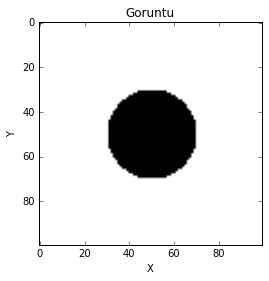

In [38]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import scipy
A=np.ones([100,100])
X,Y=np.meshgrid(np.r_[0:100], np.r_[0:100]);
ind=np.sqrt((X-50.)**2+(Y-50.)**2)<20
A[ind]=0;

setup_graph(x_label='X', y_label='Y', title='Goruntu')
plt.imshow(A);plt.gray();

### Simdi de frekans bolgesindeki karsiligina bakalim

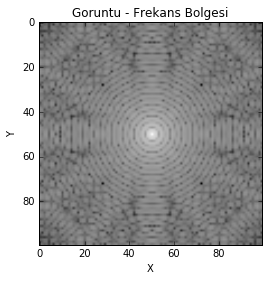

In [40]:
FA=np.fft.fftshift(np.fft.fft2(A));
setup_graph(x_label='X', y_label='Y', title='Goruntu - Frekans Bolgesi')
plt.imshow(10*np.log10(np.abs(FA)));plt.gray();

# Frekans bolgesi gosteriminde X=50, Y=50 noktasi (orta nokta) en temel frekansi gostermekte, ve frekans degerleri bu noktadan uzaklastikca artmaktadir. Bu nedenle aslinda hazirladigimiz daire goruntusunu bir yuksek geciren filtre olarak kullanabiliriz. Matematiksel tersi de alcak geciren filtredir. 

# Filtreleri frekans bolgesinde carpma islemi ile uygulayabiliriz.


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in log10


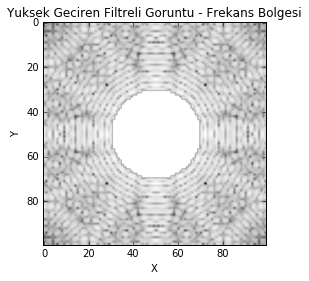

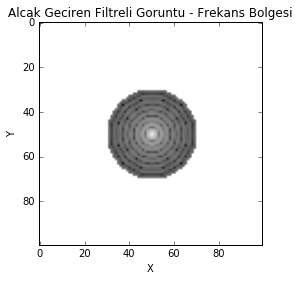

In [41]:
highPassFA=FA*A;
lowPassFA =FA*(1-A);

setup_graph(x_label='X', y_label='Y', title='Yuksek Geciren Filtreli Goruntu - Frekans Bolgesi')
plt.imshow(10*np.log10(np.abs(highPassFA)));plt.gray();

setup_graph(x_label='X', y_label='Y', title='Alcak Geciren Filtreli Goruntu - Frekans Bolgesi')
plt.imshow(10*np.log10(np.abs(lowPassFA)));plt.gray();

### Frekans bolgesinden tekrar mekansal gosterime gecersek filtre sonuclarini gorebiliriz. 

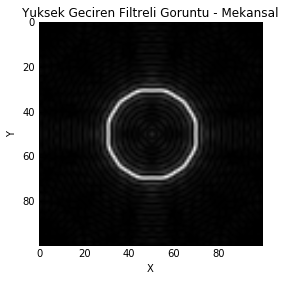

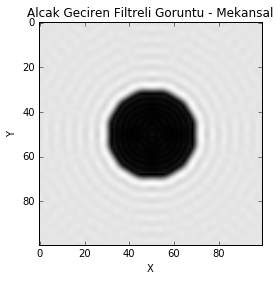

In [42]:
lowPassA=np.fft.ifft2(np.fft.ifftshift(lowPassFA))
highPassA=np.fft.ifft2(np.fft.ifftshift(highPassFA))

setup_graph(x_label='X', y_label='Y', title='Yuksek Geciren Filtreli Goruntu - Mekansal')
plt.imshow((np.abs(highPassA)));plt.gray();

setup_graph(x_label='X', y_label='Y', title='Alcak Geciren Filtreli Goruntu - Mekansal')
plt.imshow((np.abs(lowPassA)));plt.gray();